In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split#burada elimizde sadece train data oldugu icin bu verileri
#train ve test olmak üzere ayirmak icin kütüphane3den bu sinifi import ettik 
import matplotlib.pyplot as plt

#DATA PRE-PROCESSING

In [ ]:
data= pd.read_excel('/content/asg_1_-_train_data.xlsx')

In [ ]:
data

,Price,Year,Type,Shift,km,Power,Engine,Seller
0,24900,2004,Diesel,Manual,270000,70,1248,Dealer
1,27500,2004,Gasoline,Manual,164000,75,1199,Dealer
2,42500,2008,Diesel,Auto,300000,90,1248,Dealer
3,63750,2017,Gasoline,Auto,8780,90,1398,Dealer
4,25000,2004,Diesel,Manual,200000,70,1248,Owner
...,...,...,...,...,...,...,...,...
2895,12000,1993,LPG,Manual,187000,76,1201,Owner
2896,42500,2009,Gasoline,Auto,68500,80,1229,Owner
2897,35750,2012,LPG,Manual,142257,100,1364,Owner
2898,34750,2010,Diesel,Manual,135000,90,1248,Dealer


In [ ]:
data.head()

,Price,Year,Type,Shift,km,Power,Engine,Seller
0,24900,2004,Diesel,Manual,270000,70,1248,Dealer
1,27500,2004,Gasoline,Manual,164000,75,1199,Dealer
2,42500,2008,Diesel,Auto,300000,90,1248,Dealer
3,63750,2017,Gasoline,Auto,8780,90,1398,Dealer
4,25000,2004,Diesel,Manual,200000,70,1248,Owner


In [ ]:
data.tail()

,Price,Year,Type,Shift,km,Power,Engine,Seller
2895,12000,1993,LPG,Manual,187000,76,1201,Owner
2896,42500,2009,Gasoline,Auto,68500,80,1229,Owner
2897,35750,2012,LPG,Manual,142257,100,1364,Owner
2898,34750,2010,Diesel,Manual,135000,90,1248,Dealer
2899,40500,2014,Diesel,Manual,131500,75,1248,Dealer


In [ ]:
data.corr()

,Price,Year,km,Power,Engine
Price,1.000000,0.888699,-0.779738,0.250927,-0.040480
Year,0.888699,1.000000,-0.696329,0.184026,-0.164357
km,-0.779738,-0.696329,1.000000,-0.198663,0.060069
Power,0.250927,0.184026,-0.198663,1.000000,0.478913
Engine,-0.040480,-0.164357,0.060069,0.478913,1.000000


In [ ]:
data.drop(columns='Seller', inplace=True)

In [ ]:
data

,Price,Year,Type,Shift,km,Power,Engine
0,24900,2004,Diesel,Manual,270000,70,1248
1,27500,2004,Gasoline,Manual,164000,75,1199
2,42500,2008,Diesel,Auto,300000,90,1248
3,63750,2017,Gasoline,Auto,8780,90,1398
4,25000,2004,Diesel,Manual,200000,70,1248
...,...,...,...,...,...,...,...
2895,12000,1993,LPG,Manual,187000,76,1201
2896,42500,2009,Gasoline,Auto,68500,80,1229
2897,35750,2012,LPG,Manual,142257,100,1364
2898,34750,2010,Diesel,Manual,135000,90,1248


In [ ]:
data.head()

,Price,Year,Type,Shift,km,Power,Engine
0,24900,2004,Diesel,Manual,270000,70,1248
1,27500,2004,Gasoline,Manual,164000,75,1199
2,42500,2008,Diesel,Auto,300000,90,1248
3,63750,2017,Gasoline,Auto,8780,90,1398
4,25000,2004,Diesel,Manual,200000,70,1248


In [ ]:
encoded_data=pd.get_dummies(data, columns=['Type','Shift'])#veri string olarak kullanilamz onun icin encoding yaparak bunu numericlestiriyoruz

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer


In [ ]:
encoded_data

,Price,Year,km,Power,Engine,Type_Diesel,Type_Gasoline,Type_LPG,Shift_Auto,Shift_Manual
0,24900,2004,270000,70,1248,1,0,0,0,1
1,27500,2004,164000,75,1199,0,1,0,0,1
2,42500,2008,300000,90,1248,1,0,0,1,0
3,63750,2017,8780,90,1398,0,1,0,1,0
4,25000,2004,200000,70,1248,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2895,12000,1993,187000,76,1201,0,0,1,0,1
2896,42500,2009,68500,80,1229,0,1,0,1,0
2897,35750,2012,142257,100,1364,0,0,1,0,1
2898,34750,2010,135000,90,1248,1,0,0,0,1


In [ ]:
data.Type.value_counts()

Gasoline    1133
Diesel      1113
LPG          654
Name: Type, dtype: int64

In [ ]:
data.isnull().values.any()

False

In [ ]:
encoded_data.corr()

,Price,Year,km,Power,Engine,Type_Diesel,Type_Gasoline,Type_LPG,Shift_Auto,Shift_Manual
Price,1.000000,0.888699,-0.779738,0.250927,-0.040480,-0.023601,0.331663,-0.359738,0.366022,-0.366022
Year,0.888699,1.000000,-0.696329,0.184026,-0.164357,0.166115,0.233259,-0.465615,0.177944,-0.177944
km,-0.779738,-0.696329,1.000000,-0.198663,0.060069,0.264916,-0.496467,0.271336,-0.332779,0.332779
Power,0.250927,0.184026,-0.198663,1.000000,0.478913,-0.197997,0.174833,0.026287,0.199085,-0.199085
Engine,-0.040480,-0.164357,0.060069,0.478913,1.000000,-0.133879,-0.015547,0.173937,0.108587,-0.108587
Type_Diesel,-0.023601,0.166115,0.264916,-0.197997,-0.133879,1.000000,-0.631949,-0.425862,-0.402315,0.402315
Type_Gasoline,0.331663,0.233259,-0.496467,0.174833,-0.015547,-0.631949,1.000000,-0.432096,0.407048,-0.407048
Type_LPG,-0.359738,-0.465615,0.271336,0.026287,0.173937,-0.425862,-0.432096,1.000000,-0.007062,0.007062
Shift_Auto,0.366022,0.177944,-0.332779,0.199085,0.108587,-0.402315,0.407048,-0.007062,1.000000,-1.000000
Shift_Manual,-0.366022,-0.177944,0.332779,-0.199085,-0.108587,0.402315,-0.407048,0.007062,-1.000000,1.000000


In [ ]:
#istenilen degeri istenilen deger araligina cekemek icin kullanilir MinMaxScaler
scaler=MinMaxScaler()
column_transformer=make_column_transformer(
    #burada istenilen araliga cekilen degerlerin tekrardan columnlara  eklenmesi yapildi
                                            (MinMaxScaler(),['km','Year'])
                                          )

In [ ]:
encoded_data[['km','Year']]=column_transformer.fit_transform(encoded_data)

In [ ]:
encoded_data

,Price,Year,km,Power,Engine,Type_Diesel,Type_Gasoline,Type_LPG,Shift_Auto,Shift_Manual
0,24900,0.518519,0.586957,70,1248,1,0,0,0,1
1,27500,0.518519,0.356522,75,1199,0,1,0,0,1
2,42500,0.666667,0.652174,90,1248,1,0,0,1,0
3,63750,1.000000,0.019087,90,1398,0,1,0,1,0
4,25000,0.518519,0.434783,70,1248,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2895,12000,0.111111,0.406522,76,1201,0,0,1,0,1
2896,42500,0.703704,0.148913,80,1229,0,1,0,1,0
2897,35750,0.814815,0.309254,100,1364,0,0,1,0,1
2898,34750,0.740741,0.293478,90,1248,1,0,0,0,1


In [ ]:
encoded_data.head()

,Price,Year,km,Power,Engine,Type_Diesel,Type_Gasoline,Type_LPG,Shift_Auto,Shift_Manual
0,24900,0.518519,0.586957,70,1248,1,0,0,0,1
1,27500,0.518519,0.356522,75,1199,0,1,0,0,1
2,42500,0.666667,0.652174,90,1248,1,0,0,1,0
3,63750,1.000000,0.019087,90,1398,0,1,0,1,0
4,25000,0.518519,0.434783,70,1248,1,0,0,0,1


In [ ]:
encoded_data

,Price,Year,km,Power,Engine,Type_Diesel,Type_Gasoline,Type_LPG,Shift_Auto,Shift_Manual
0,24900,0.518519,0.586957,70,1248,1,0,0,0,1
1,27500,0.518519,0.356522,75,1199,0,1,0,0,1
2,42500,0.666667,0.652174,90,1248,1,0,0,1,0
3,63750,1.000000,0.019087,90,1398,0,1,0,1,0
4,25000,0.518519,0.434783,70,1248,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2895,12000,0.111111,0.406522,76,1201,0,0,1,0,1
2896,42500,0.703704,0.148913,80,1229,0,1,0,1,0
2897,35750,0.814815,0.309254,100,1364,0,0,1,0,1
2898,34750,0.740741,0.293478,90,1248,1,0,0,0,1


In [ ]:
X=encoded_data.iloc[:,1:].to_numpy(dtype=np.float32)
y=encoded_data.iloc[:,0].to_numpy(dtype=np.float32)

In [ ]:
X.shape, y.shape

((2900, 9), (2900,))

In [ ]:
X_test,X_train,y_test,y_train =train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((580, 9), (2320, 9), (580,), (2320,))

In [ ]:
X_train.shape,y_train.shape

((580, 9), (580,))

#MODEL OLUSTURMA

In [ ]:
model1=tf.keras.Sequential([
                            tf.keras.layers.Dense(128,  activation='relu'),
                            tf.keras.layers.Dense(128,  activation='relu'),
                            tf.keras.layers.Dense(64,   activation='relu'),
                            tf.keras.layers.Dense(1)

])

In [ ]:
model1.compile(loss=tf.keras.losses.mean_absolute_error,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=tf.keras.metrics.mse)

In [ ]:
history1=model1.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_test,y_test)

)

Epoch 1/30
19/19 [==============================] - 2s 25ms/step - loss: 35209.9297 - mean_squared_error: 1400275584.0000 - val_loss: 34092.0195 - val_mean_squared_error: 1326428032.0000
Epoch 2/30
19/19 [==============================] - 0s 13ms/step - loss: 33248.6133 - mean_squared_error: 1266249984.0000 - val_loss: 30591.0938 - val_mean_squared_error: 1100350464.0000
Epoch 3/30
19/19 [==============================] - 0s 12ms/step - loss: 27304.9258 - mean_squared_error: 913198080.0000 - val_loss: 20616.9160 - val_mean_squared_error: 586428224.0000
Epoch 4/30
19/19 [==============================] - 0s 13ms/step - loss: 14892.3379 - mean_squared_error: 346653600.0000 - val_loss: 10714.9453 - val_mean_squared_error: 174038416.0000
Epoch 5/30
19/19 [==============================] - 0s 13ms/step - loss: 10906.2988 - mean_squared_error: 181892864.0000 - val_loss: 10971.1533 - val_mean_squared_error: 185476544.0000
Epoch 6/30
19/19 [==============================] - 0s 13ms/step - loss

In [ ]:
!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py'

--2022-03-06 22:40:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-06 22:40:39 (76.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
 def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
 # accuracy = history.history["accuracy"]
  #val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="validation loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  #plt.plot(epochs, accuracy, label="training accuracy")
  #plt.plot(epochs, val_accuracy, label="validation accuracy")
  #plt.title("accuracy")
 # plt.xlabel("epochs")
  plt.legend;

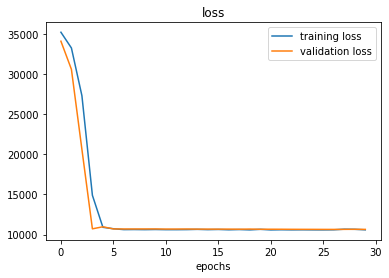

<Figure size 432x288 with 0 Axes>

In [ ]:
 plot_loss_curves(history1)

In [ ]:
sample=X_test[15]
sample

array([8.518519e-01, 5.652174e-02, 5.100000e+01, 1.201000e+03,
       0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00], dtype=float32)

In [ ]:
y_sample=y_test[15]
y_sample

39000.0

In [ ]:
model1.predict(tf.expand_dims(sample, axis=0))

array([[31425.889]], dtype=float32)